### Prediction using Unsupervised ML
#### The Sparks Foundation Task 2
#### Author: Tanmay Arora
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

#### Importing the Header Files and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
df.shape

(150, 4)

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

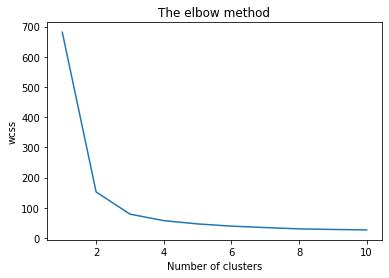

In [7]:
x=df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = [] # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
              max_iter = 300, n_init = 10 ,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

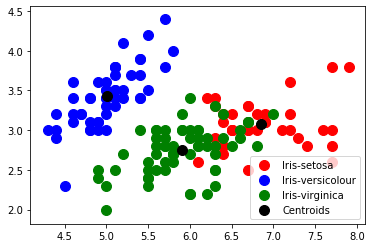

In [10]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],
            s = 100, c ='red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],
            s = 100, c ='blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],
            s = 100, c ='green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids')
plt.legend()